# COMP90014 Assignment 2
### Semester 2, 2020



This assignment should be completed by each student individually. Make sure you read this entire document, and ask for help if anything is not clear. Any changes or clarification to this document will be announced via Canvas.

Please make sure you are aware of the University's rules on academic honesty and plagiarism, which are very strict: https://academichonesty.unimelb.edu.au/ 

Make sure you **do not** copy any code either from other students or from the internet. This is considered plagiarism. It is generally a good idea to avoid looking at any solutions as you may find it surprisingly difficult to generate your own solution to the problem once you have seen somebody else's.

Your completed notebook file containing all your answers will be turned in via Canvas. No other files or formats will be accepted - only upload the completed `.ipynb` file.

### Overview
To complete the assignment you will need to finish the tasks in this notebook. There are multiple tasks that are connected in a logical order.

The tasks are a combination of writing your own implementations of algorithms and data structures we've discussed in lectures (including adapting or describing them in plain English or pseudocode), interpret and analyse results  and your implementation choices. Each answer question has a word limit that will be strictly enforced! **Please note that for this assignment, you may be awarded a mark of zero for a question if you go over the word limit.**

In some case, we have provided test input and test output that you can use to try out your solutions. These tests are just samples and are not exhaustive - they may warn you if you've made a mistake, but they are not guaranteed to. It's up to you to decide whether your code is correct.

### Pseudocode
Pseudocode for algorithms are a series of logical steps which any programmer can understand.
Here is the pseudocode for a function fizzbuzz to print numbers that are divisible by 3 or 5:

```
function fizzbuzz()
    For i = 1 to 100
        If i is divisible by 3 Then
            Print "Fizz"
        If i is divisible by 5 Then
            Print "Buzz"
```
      
As you can see, the basic steps are shown, but there is no language-specific syntax. <br>
In this manner, pseudocode explains the algorithm procedure in **direct, plain language.** <br>
As a note, if your function calls another function (lets call this function **boom**), write it as **boom()** in the pseudocode. The open/close brackets show that 'boom' is another function call.

There are no real conventions aside from the above, so please use a style which you think is **clearest.**

### Written Answer Questions

A portion of this assignment is written answer. <br>
We ask for students to use bullet points when possible. Bullet points clearly outline the order of steps which need to be performed. <br>

Here is an example:<br>
**Question:** <br>
Describe with your own words how you would implement a function to calculate the GC content of a DNA sequence <br>
**Answer:** <br>
The GC content is the proportion of nucleotides that are either guanine ('G') or cytosine('C') in a sequence. To calculate:
* record the length of the sequence
* set a variable (call it GC_count) to 0 which will store the number of G and C bases
* for each nucleotide in the sequence:
    * if the nucleotide is 'G' or 'C', increment GC_count by 1
* return GC_count / sequence length * 100
* This will return the GC content as a percentage of all nucleotides

These written answers don't need to be as detailed as pseudocode, where you should note any variables you declare, functions you call etc. <br>
Written answers should be interpretable by a bioinformatician, who could then understand your method and write code if necessary. <br>
The broad ideas and logical steps need to be there, but the exactly implementation does not always have to be written. <br>
Pseudocode is a little different, and should be addressed as per the cell above.

### Marking

Cells that must be completed to receive marks are clearly labeled. There are 14 graded cells, some of which are code cells, in which you must complete the code to solve a problem, and some of which are markdown cells, in which you must write your answers to questions or descriptions of algorithmic approaches (pseudocode or plain English might be requested). In order to get full marks, your code/answer needs to be clear, unambiguous, with adequate level of detail (and comments for Python code) as well as optimal time complexity. **Code style, readability and efficiency** will be taken into consideration.

The total marks for the assignment add up to 40, and it will be worth 15% of your overall subject grade.

## Part I

### Background and data 

WGCNA stands for weighted gene co-expression network analysis. It is a data analysis technique used for studying biological networks based on pairwise correlations of gene expression data. WGCNA is good at identifying clusters of genes that may be co-regulated, and therefore may have shared biological function.

For this assignment, you will primarily be using the [FlyAtlas](http://flyatlas.org) dataset. For this assignment, instead of using the probe-wise dataset, we will be using the expression value for each gene.



### Setup 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import altair

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import scipy
import re
from io import StringIO
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform

### Read in data

In [3]:
raw_expression = pd.read_csv('flyatlas_subset.csv.gz', index_col=0)

In [4]:
raw_expression.head()

,Adult Hind Gut biological rep1,Adult Hind Gut biological rep2,Adult Hind Gut biological rep3,Adult Hind Gut biological rep4,Adult Mid Gut biological rep1,Adult Mid Gut biological rep2,Adult Mid Gut biological rep3,Adult Mid Gut biological rep4,Adult Accessory gland biological rep1,Adult Accessory gland biological rep2,...,Adult Thoracic Muscle biological rep3,Adult Thoracic Muscle biological rep4,Adult Wings biological rep1,Adult Wings biological rep2,Adult Wings biological rep3,Adult Wings biological rep4,Adult Female Spermatheca Mated (REDONE) biological rep1,Adult Female Spermatheca Mated (REDONE) biological rep2,Adult Female Spermatheca Mated (REDONE) biological rep3,"Adult Female Spermatheca Mated (REDONE) biological rep4""\n"
Gene Symbol,,,,,,,,,,,,,,,,,,,,,
128up,214.51500,246.59700,216.58100,221.66700,264.602000,281.02000,300.132000,255.19500,427.68900,467.309000,...,113.9360,363.59600,196.98400,262.50700,181.05800,204.36200,380.878000,112.6860,294.49000,329.094000
140up,139.86300,181.65600,143.80200,149.44800,92.043300,82.10540,77.407200,91.44190,116.91800,124.892000,...,155.8030,110.83100,79.40570,81.80540,76.40320,68.40710,85.908800,128.3340,87.18940,104.890000
18w,241.72200,247.02900,245.75500,262.18900,54.108400,60.05170,60.698900,54.93600,33.02630,39.497000,...,100.4050,294.09100,772.38800,700.44800,752.14300,754.71500,285.764000,66.5310,248.04200,264.250000
312,4.16597,2.60007,3.53377,4.60587,0.194508,0.57742,0.977839,2.65123,8.84807,0.342770,...,68.3797,0.36183,7.03675,2.94253,8.25821,5.44387,5.008850,35.0969,2.39418,2.270310
7B2,25.78430,19.12000,34.80000,21.64910,89.001700,116.57100,114.170000,123.40500,2.34292,0.618435,...,175.8510,1.38861,172.11500,194.96700,128.78000,183.37900,0.842605,16.0162,2.64286,0.579274


The data frame has 18952 rows (measurements) and 136 columns (samples) so it is certainly high dimensional.These 136 columns represent 4 replicates each from 34 different tissue types.

We will set numpy and pandas to display numbers to just two decimal places in this notebook - this won't affect the actual numbers, just their display, and you can change it if you prefer.

In [5]:
np.set_printoptions(precision=2)
pd.options.display.precision=2

In [6]:
# The actual stored numbers have not changed
raw_expression.head()

,Adult Hind Gut biological rep1,Adult Hind Gut biological rep2,Adult Hind Gut biological rep3,Adult Hind Gut biological rep4,Adult Mid Gut biological rep1,Adult Mid Gut biological rep2,Adult Mid Gut biological rep3,Adult Mid Gut biological rep4,Adult Accessory gland biological rep1,Adult Accessory gland biological rep2,...,Adult Thoracic Muscle biological rep3,Adult Thoracic Muscle biological rep4,Adult Wings biological rep1,Adult Wings biological rep2,Adult Wings biological rep3,Adult Wings biological rep4,Adult Female Spermatheca Mated (REDONE) biological rep1,Adult Female Spermatheca Mated (REDONE) biological rep2,Adult Female Spermatheca Mated (REDONE) biological rep3,"Adult Female Spermatheca Mated (REDONE) biological rep4""\n"
Gene Symbol,,,,,,,,,,,,,,,,,,,,,
128up,214.51,246.60,216.58,221.67,264.60,281.02,300.13,255.19,427.69,467.31,...,113.94,363.60,196.98,262.51,181.06,204.36,380.88,112.69,294.49,329.09
140up,139.86,181.66,143.80,149.45,92.04,82.11,77.41,91.44,116.92,124.89,...,155.80,110.83,79.41,81.81,76.40,68.41,85.91,128.33,87.19,104.89
18w,241.72,247.03,245.75,262.19,54.11,60.05,60.70,54.94,33.03,39.50,...,100.41,294.09,772.39,700.45,752.14,754.72,285.76,66.53,248.04,264.25
312,4.17,2.60,3.53,4.61,0.19,0.58,0.98,2.65,8.85,0.34,...,68.38,0.36,7.04,2.94,8.26,5.44,5.01,35.10,2.39,2.27
7B2,25.78,19.12,34.80,21.65,89.00,116.57,114.17,123.41,2.34,0.62,...,175.85,1.39,172.12,194.97,128.78,183.38,0.84,16.02,2.64,0.58


<br>It's common practice to take the log of expression values. Here is a visual motivation as to why this may be useful:

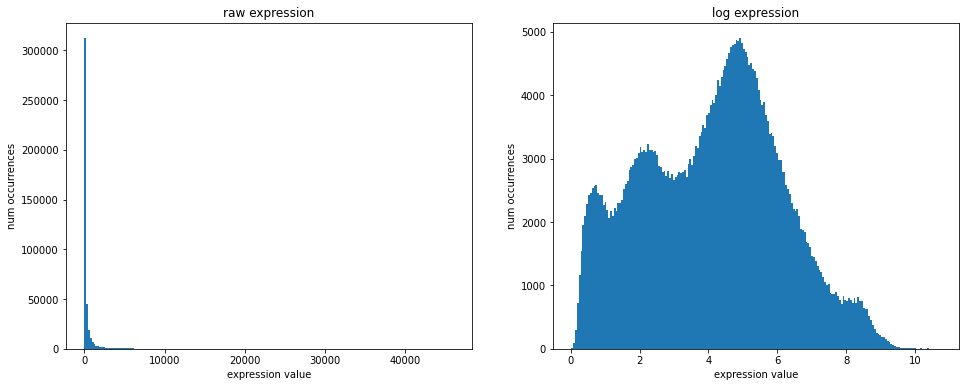

In [15]:
log_expression = np.log(raw_expression + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
ax1.hist(raw_expression.values.flatten(), bins=200)
ax1.set_title('raw expression')
ax1.set_xlabel('expression value')
ax1.set_ylabel('num occurrences')
ax2.hist(log_expression.values.flatten(), bins=200)
ax2.set_title('log expression')
ax2.set_xlabel('expression value')
ax2.set_ylabel('num occurrences')
plt.show()

<br>
From here on, we will use 'log_expression' as our sample data

In [ ]:
log_expression = np.log(raw_expression + 1)

<br>
The following code snippet removes the replicate name from each sample, so we can use these labels as categories for plotting later.

In [ ]:
tissues_list = [re.match('(.+?)(( biological)? rep\d+)', c).group(1)
                     for c in raw_expression.columns]
tissues = pd.Series(tissues_list, index = raw_expression.columns)

In [ ]:
len(tissues)

<br><br>
### Task 1 - Building a correlation matrix

**Task (1a)**

The [FlyAtlas](http://flyatlas.org) dataset contains four biological replicates for each tissue. Combine the biological replicates by calculating the mean expression value for each gene in each tissue.

In [ ]:
# ~~ GRADED CELL (1 mark) - complete this cell ~~

def average_by_tissue(expression, tissues):
    '''
    Given a DataFrame of gene expression data, 
    and a list, array or Series of tissues corresponding to the columns of the dataframe,
    average over the expression values in each gene for each tissue type and
    return the resulting dataframe. 
    The columns of the new dataframe should correspond to the provided tissues.
    '''


The below test case should return

```
      A    B
0   4.5  2.5
1  10.0  7.0
```


In [ ]:
test_df = pd.DataFrame([[5,4,3,2],[10,10,6,8]])
print(average_by_tissue(test_df, ['A','A','B','B']))

In [ ]:
# Calculate expression for each tissue in the flyatlas data
tissue_expression = average_by_tissue(log_expression, tissues)

In [ ]:
tissue_expression.shape

**Task (1b)**

WGCNA starts by building a pairwise correlation matrix of genes. Using the matrix you just created, produce an *unsigned* correlation matrix where each cell contains the absolute value of the correlation coefficients.

You can calculate the Pearson correlation values yourself, or look up a numpy or scipy function to do so.

In [ ]:
# ~~ GRADED CELL (2 mark) - complete this cell ~~

def calculate_unsigned_correlation(expression):
    ''' 
    Produce the unsigned correlation matrix for a table of gene expression values.
    Assume that the columns of the expression matrix are samples and the rows are
    genes, and return an array of arrays giving the Pearson correlation between each pair of genes,
    in the same order as the rows of the expression table.
    '''


The below test case should return (if displayed to a precision of two decimal places)

```
array([[ 1.  ,  0.95,  0.96,  0.44,  0.3 ,  0.15],
       [ 0.95,  1.  ,  1.  ,  0.71,  0.59,  0.46],
       [ 0.96,  1.  ,  1.  ,  0.67,  0.54,  0.41],
       [ 0.44,  0.71,  0.67,  1.  ,  0.99,  0.95],
       [ 0.3 ,  0.59,  0.54,  0.99,  1.  ,  0.99],
       [ 0.15,  0.46,  0.41,  0.95,  0.99,  1.  ]])
```

In [ ]:
test_df = pd.DataFrame([[ 3.8,  2.7,  4.5],
                       [ 4.3,  3.4,  6.2],
                       [ 5.3,  4.3,  7. ],
                       [ 4.6,  6. ,  7.7],
                       [ 5.2,  7.3,  8.8],
                       [ 6.2,  8.5,  9.4]], 
                         columns=['Tissue1', 'Tissue2', 'Tissue3'],
                         index=['GeneA', 'GeneB', 'GeneC', 'GeneD', 'GeneE', 'GeneF'])
calculate_unsigned_correlation(test_df)

The below test case should return (if displayed to a precision of two decimal places)

```
array([[ 1.  ,  0.95,  0.3 ,  0.15],
       [ 0.95,  1.  ,  0.59,  0.46],
       [ 0.3 ,  0.59,  1.  ,  0.99],
       [ 0.15,  0.46,  0.99,  1.  ]])
```

In [ ]:
test_df = pd.DataFrame([[ 3.8,  2.7,  4.5],
                       [ 4.3,  3.4,  6.2],
                       [ 5.2,  7.3,  8.8],
                       [ 6.2,  8.5,  9.4]], 
                         columns=['Tissue1', 'Tissue2', 'Tissue3'],
                         index=['GeneA', 'GeneB', 'GeneC', 'GeneD'])
calculate_unsigned_correlation(test_df)

In [ ]:
# Calculate the correlation matrix for the flyatlas data
unsigned_correlation = calculate_unsigned_correlation(tissue_expression)
_ = plt.hist(unsigned_correlation.flatten(), bins=100)

<br>
**TASK (1c)** Why are we using an unsigned correlation matrix instead of a signed correlation matrix? (max 50 words)

In [ ]:
# ~~ GRADED CELL (1 mark) - your answer here --


### Task 2 - Building an adjacency matrix

To use the correlation matrix to create a network, we will transform it into an adjacency matrix. You will create two types of adjacency matrix, a binary adjacency matrix and a weighted adjacency matrix.

**Task (2a)**

To create the binary adjacency matrix, transform the correlation matrix such that every correlation greater than or equal to a given threshold value is considered adjacent (represented by a 1 in the matrix), and every correlation below that value is considered not adjacent (represented by a 0). Set the diagonal of the adjacency matrix to 0, so that we don't consider a node to be adjacent to itself.

In [ ]:
# ~~ GRADED CELL (1 marks) - complete this cell ~~

def calculate_binary_adjacencies(correlation, threshold):
    '''
    Given a correlation matrix between genes of shape (N,N),
    return the corresponding binary adjacency matrix of shape (N,N),
    where correlation values are above the given threshold.
    '''


The below test case should return (if displayed to a precision of two decimal places)

```
array([[ 0.,  1.,  0.,  0.],
       [ 1.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  1.],
       [ 0.,  0.,  1.,  0.]])
```

In [ ]:
test_corr = np.array([[ 1.  ,  0.95,  0.3 ,  0.15],
       [ 0.95,  1.  ,  0.59,  0.46],
       [ 0.3 ,  0.59,  1.  ,  0.99],
       [ 0.15,  0.46,  0.99,  1.  ]])
calculate_binary_adjacencies(test_corr, 0.5)

The below test case should return (if displayed to a precision of two decimal places)

```
array([[ 0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.]])
```

In [ ]:
test_corr = np.array([[ 1.  ,  0.95,  0.3 ,  0.15],
       [ 0.95,  1.  ,  0.59,  0.46],
       [ 0.3 ,  0.59,  1.  ,  0.99],
       [ 0.15,  0.46,  0.99,  1.  ]])
calculate_binary_adjacencies(test_corr, 0.6)

In [ ]:
# Calculate the binary adjacency matrix for the flyatlas data
adjacency_binary = calculate_binary_adjacencies(unsigned_correlation, 0.85)

**Task (2b)**

Calculate the connectivity of the adjacency matrix by dividing the total number of edges by the number of possible edges.

In [6]:
# ~~ GRADED CELL (1 mark) - complete this cell ~~

def calculate_connectivity(adjacency):
    '''
    Calculate the number of edges that exist in a given binary adjacency matrix,
    divided by the total number of possible edges between all nodes.
    '''
    

In [ ]:
# Should return 0.5
calculate_connectivity(np.array([[ 0.,  1.,  0.,  0.],
                                   [ 1.,  0.,  1.,  0.],
                                   [ 0.,  1.,  0.,  1.],
                                   [ 0.,  0.,  1.,  0.]]))

In [ ]:
# Should return 0.33
calculate_connectivity(np.array([[ 0.,  1.,  0.,  0.],
                                   [ 1.,  0.,  0.,  0.],
                                   [ 0.,  0.,  0.,  1.],
                                   [ 0.,  0.,  1.,  0.]]))

In [ ]:
calculate_connectivity(adjacency_binary)

**Task 2(c)**

The weighted adjacency matrix can be created by raising the correlation matrix to some power. Write a function that raises the correlation matrix to some power, `beta`, and sets the diagonal to `0`. For the rest of the assignment we will use `beta = 4` but your function should accept any integer.

In [7]:
# ~~ GRADED CELL (2 marks) - complete this cell ~~

def calculate_weighted_adjacencies(correlation, beta):
    '''
    Given a correlation matrix between genes of shape (N,N),
    return the corresponding binary adjacency matrix of shape (N,N),
    where we use a power-law soft threshold with parameter beta.
    '''


The below test case should return (if displayed to a precision of two decimal places)

```
array([[ 0.  ,  0.9 ,  0.09,  0.02],
       [ 0.9 ,  0.  ,  0.35,  0.21],
       [ 0.09,  0.35,  0.  ,  0.98],
       [ 0.02,  0.21,  0.98,  0.  ]])
```

In [ ]:
test_corr = np.array([[ 1.  ,  0.95,  0.3 ,  0.15],
       [ 0.95,  1.  ,  0.59,  0.46],
       [ 0.3 ,  0.59,  1.  ,  0.99],
       [ 0.15,  0.46,  0.99,  1.  ]])
calculate_weighted_adjacencies(test_corr, 2)

The below test case should return (if displayed to a precision of two decimal places)

```
array([[ 0.  ,  0.86,  0.03,  0.  ],
       [ 0.86,  0.  ,  0.21,  0.1 ],
       [ 0.03,  0.21,  0.  ,  0.97],
       [ 0.  ,  0.1 ,  0.97,  0.  ]])
```

In [ ]:
test_corr = np.array([[ 1.  ,  0.95,  0.3 ,  0.15],
       [ 0.95,  1.  ,  0.59,  0.46],
       [ 0.3 ,  0.59,  1.  ,  0.99],
       [ 0.15,  0.46,  0.99,  1.  ]])
calculate_weighted_adjacencies(test_corr, 3)

In [ ]:
# Calculate the weighted adjacency matrix for the flyatlas data
adjacency_weighted = calculate_weighted_adjacencies(unsigned_correlation, 4)

**Task 2(d)**

How do you expect the network connectivity would change if the threshold for the binary adjacency matrix is increased or decreased? (max 50 words)

In [ ]:
# ~~ GRADED CELL (1 mark) - your answer here --

### Task 3 - Dimensionality Reduction

In this task we will be performing Priciple Components Analysis to determine which gene in the first principle component has the highest contribution to the variance.

**Task 4(a)**

Perform a Principle Componanets Analysis on the log_expression matrix with the correct number of components and print the explained variance by component list.

In [ ]:
# ~~ GRADED CELL (1 mark) - complete this cell ~~

**Task 4(b)**

Print the gene that contributes most to the first eigen vector (the first principle component) of the PCA. The word limit on the second cell is 50 words.

In [1]:
# ~~ GRADED CELL (2 marks) - complete this cell ~~

### Task 4 - Graph Metrics

Graph metrics are important parameters to assist in characterising a network as a whole or even the relative importance of specific nodes in a network and could give us hints regarding their importance.

**Task 5(a)**

Normalised Degree Centrality

Describe an algorithm in pseudocode that returns the normalised degree centrality of a node (degree divided by the maximum node degree in the graph), receiving as parameters a node index **i** and its binary adjacency matrix **m**.

In [ ]:
# ~~ GRADED CELL (2 marks) - your answer here --

**Task 5(b)**

Closeness Centrality

Describe an algorithm in pseudocode that returns the closeness centrality of a node, receiving as parameters a node index **i** and its binary adjacency matrix **m**. As part of your answer you can assume the function *min_dist(a,b,m)* is available. This function will return the minimum distance between nodes a and b in a graph represented by the adjecendy matrix m.

In [10]:
# ~~ GRADED CELL (2 marks) - your answer here --

**Task 5(c)**

Clustering Coefficient and Average Path Length are two important properties to distinguish between different network types.

Consider that you are working with a particular biological network. Describe briefly, with your own words, how would you use these properties to verify whether your network is consistent with a Random Network, Small-World Network or Regular Lattice Network. (Maximum 150 words).


In [11]:
# ~~ GRADED CELL (4 marks) - your answer here --

# Part II
<br>
Consider the following scenario. As a Bioinformatician you were given the task of designing a computational approach to organise (in a efficient way) genomic data of over 1,000,000 SARS-CoV2 samples extracted from patients worldwide, as well as patient information from hospitalisations to enable quick data access and to enable a better understanding of variants associated with poor patient outcomes.

Each data point is composed of:
* A patient ID and further patient information (a list of procedures performed).
* A list of variants (variant IDs) identified by sequencing the sample collected from the patient.


You are interested in building a single index, using both **patient ID** and **variant ID** to retrieve, include or remove information (list of procedures performed) in O(1) time. Your approach also needs to be memory efficient, O(n), and also built in O(n) time.

However, given the ever growing number of available sequences/patients and observed variants using (**patient ID + variant ID**) as a single key becomes impractical for traditional hash tables (considering all possible combinations for both).

**a)** Describe with **your own words** how you would implement a computational approach to achieve these requirements using or adapting an abstract data type described during our lectures (you are allowed to draw your data structure if that helps). 

In [16]:
# ~~ GRADED CELL (10 marks) - your answer here --

**(b)** Additionally, also describe in **pseudocode** the functions *search(), insert() and remove()* for your abstract data type. <br>**Python code is not acceptable**. (Maximum of 150 words)

In [17]:
# ~~ GRADED CELL (10 marks) - your answer here --